## problems : 

- when creating custom color map some values are not filled with color. Look when "annot=True". I believe, it's because you didn't do this colormap discrete. So, it takes 0 which is white, and there are many whites after it to, as it goes slowly. You need somehow to differentiate all the values after zero with different color

- when annotating heatmap 0 is there too. You need somehow hide zeros: https://stackoverflow.com/questions/40128388/replace-0-with-blank-in-dataframe-python-pandas 


if you fail with seaborn, you can try to do it in matplotlib:
https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
there you can specify list of colors for a certain range of values



## NOTES:
converting rgb to matplotlib colors: 
https://stackoverflow.com/questions/21094288/convert-list-of-rgb-codes-to-matplotlib-colormap

## TODO:
- deriving mean coverage ('height' of alignment) from the original fasta to calculate percent instead of raw count. try/except if file not found in input data

In [1]:
ls 

 Том в устройстве C имеет метку OS
 Серийный номер тома: 7E4D-BE36

 Содержимое папки C:\Users\babin.PCR_INT\python_crispr_cas9\plotting_indels

25.09.2018  18:35    <DIR>          .
25.09.2018  18:35    <DIR>          ..
25.09.2018  16:08    <DIR>          .ipynb_checkpoints
25.09.2018  18:35           156 159 creating_matrix_from_indels_dataframe.ipynb
25.09.2018  14:24            14 501 DK-14-5_S221_R1_001 assembled to OT14-5.xlsx
25.09.2018  10:56             6 960 playing_with_plots.ipynb
               3 файлов        177 620 байт
               3 папок  896 382 935 040 байт свободно


In [2]:
import pandas as pd

In [117]:
df_dels = pd.read_excel("DK-14-5_S221_R1_001 assembled to OT14-5.xlsx", cheet_name=0)

In [118]:
df_dels.head()

,"('A', 1)","('G', 2)","('T', 3)","('T', 4)","('T', 5)","('G', 6)","('T', 7)","('A', 8)","('G', 9)","('G', 10)",...,"('G', 41)","('T', 42)","('A', 43)","('G', 44)","('G', 45)","('T', 46)","('G', 47)","('G', 48)","('G', 49)","('A', 50)"
0,1.0,NaN,NaN,NaN,1.0,2.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,NaN,1.0,4.0,NaN,2.0,1,NaN
1,2.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,NaN,1.0,4.0,NaN,2.0,1,NaN
2,3.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,3.0,1.0,...,1.0,1.0,2.0,NaN,1.0,1.0,NaN,2.0,1,NaN
3,4.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,2.0,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,1,NaN
4,4.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,1,NaN


In [119]:
for col in df_dels.columns:
    col_inlist = df_dels.loc[ : , col].tolist()
    break

In [120]:
c_set_unique = set(col_inlist)

In [121]:
c_set_unique = {x for x in c_set_unique if x==x} # deleting 'nan'

In [122]:
from collections import OrderedDict

In [123]:
d = OrderedDict()

for indel in c_set_unique:
    d[indel] = col_inlist.count(indel)

In [124]:
from collections import OrderedDict

In [125]:


df_dels = pd.read_excel("DK-14-5_S221_R1_001 assembled to OT14-5.xlsx", cheet_name=0)
dic_container = []
for col in df_dels.columns:
    
    col_inlist = df_dels.loc[ : , col].tolist()
    c_set_unique = set(col_inlist)
    c_set_unique = {x for x in c_set_unique if x==x} # deleting 'nan'
    
    d = OrderedDict()
    for indel in c_set_unique:
        d[indel] = col_inlist.count(indel)
    dic_container.append(d)

In [126]:
df_from_dict = pd.DataFrame(dic_container).T

In [127]:
df_from_dict.sort_index(axis=0, ascending=False, inplace=True)

In [128]:
df_from_dict.columns = df_dels.columns

In [147]:
df_from_dict.head()

,"('A', 1)","('G', 2)","('T', 3)","('T', 4)","('T', 5)","('G', 6)","('T', 7)","('A', 8)","('G', 9)","('G', 10)",...,"('G', 41)","('T', 42)","('A', 43)","('G', 44)","('G', 45)","('T', 46)","('G', 47)","('G', 48)","('G', 49)","('A', 50)"
48.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** here we return max value from the dataframe in two steps, as 'nan' > 403 

In [150]:
ser_max = df_from_dict.max()

In [151]:
ser_max.max()

403.0

In [129]:
raw_del_count = df_from_dict.sum(axis=0)

In [130]:
raw_del_count.index

Index(['('A', 1)', '('G', 2)', '('T', 3)', '('T', 4)', '('T', 5)', '('G', 6)',
       '('T', 7)', '('A', 8)', '('G', 9)', '('G', 10)', '('A', 11)',
       '('C', 12)', '('C', 13)', '('C', 14)', '('C', 15)', '('T', 16)',
       '('G', 17)', '('C', 18)', '('A', 19)', '('C', 20)', '('A', 21)',
       '('G', 22)', '('T', 23)', '('A', 24)', '('T', 25)', '('G', 26)',
       '('C', 27)', '('A', 28)', '('T', 29)', '('G', 30)', '('G', 31)',
       '('G', 32)', '('C', 33)', '('A', 34)', '('G', 35)', '('T', 36)',
       '('G', 37)', '('G', 38)', '('C', 39)', '('A', 40)', '('G', 41)',
       '('T', 42)', '('A', 43)', '('G', 44)', '('G', 45)', '('T', 46)',
       '('G', 47)', '('G', 48)', '('G', 49)', '('A', 50)'],
      dtype='object')

In [131]:
import matplotlib.pyplot as plt
sns.set()

Text(0,0.5,'count')

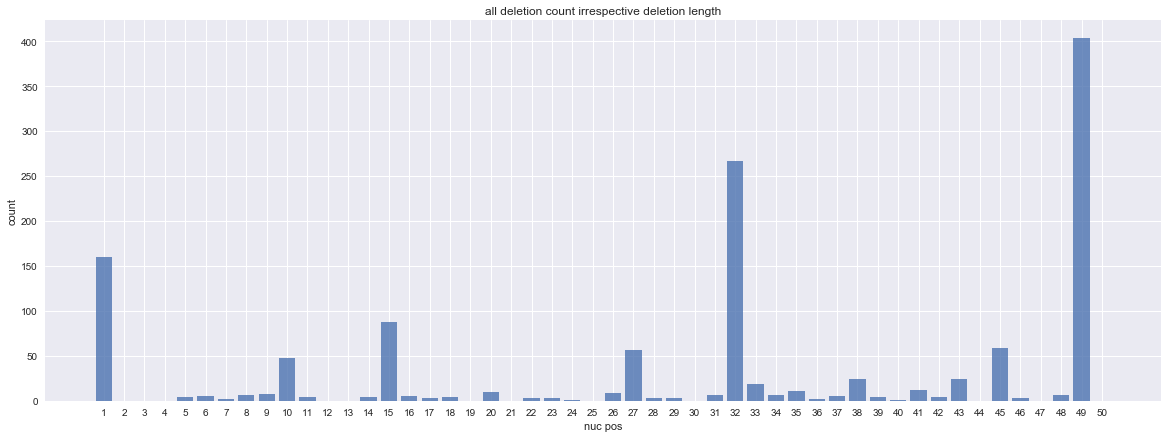

In [132]:
fig_raw_count = plt.figure(figsize=(20, 7))
plt.bar(raw_del_count.index, raw_del_count, alpha=0.8)



plt.xticks(list(range(len(raw_del_count))), list(range(1, len(raw_del_count)+1)))

plt.title("all deletion count irrespective deletion length")
plt.xlabel("nuc pos")
plt.ylabel("count")

In [133]:
import seaborn as sns

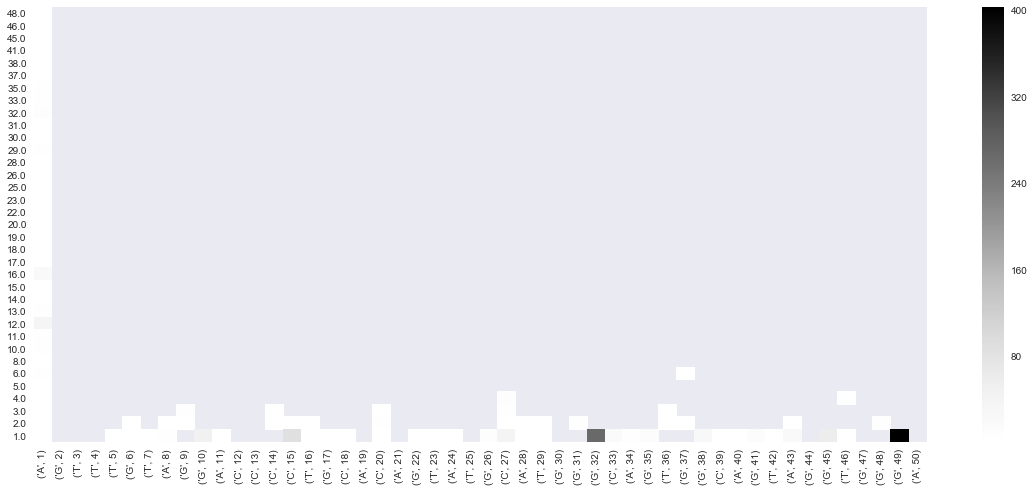

In [134]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 8))
sns.heatmap(df_from_dict, cmap="Greys")



plt.show()

from here : 
https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar

In [136]:
cmap = plt.cm.jet

In [137]:
cmaplist = [cmap(i) for i in range(cmap.N)]

In [138]:
cmaplist[0] = (.5, .5, .5, 1.0)

In [139]:
len(cmaplist)

256

In [140]:
import matplotlib as mpl
import numpy as np

In [141]:
#cmaplist[0] = (1, 1, 1, 1)

In [142]:
len(cmaplist)

256

In [143]:
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

In [144]:
bounds = np.linspace(0,403,403)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

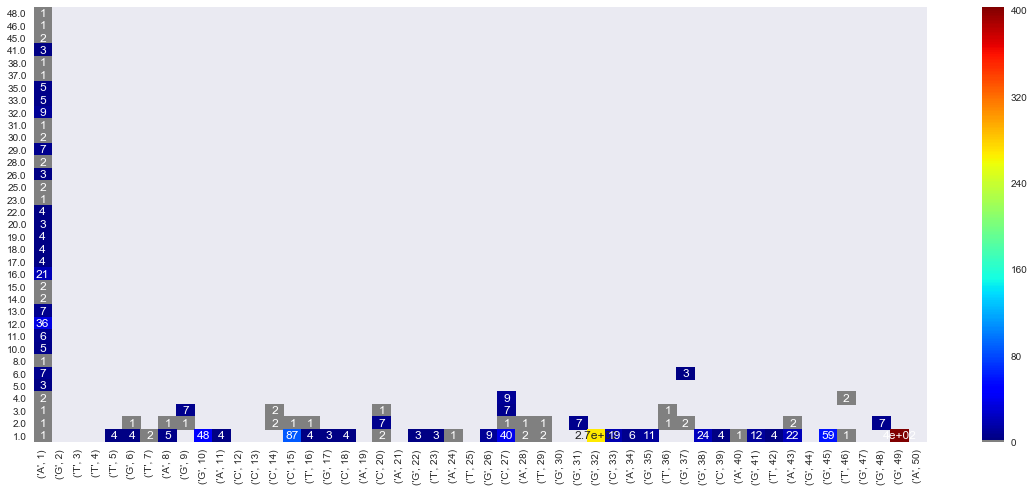

In [145]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 8))
sns.heatmap(df_from_dict, cmap=cmap, norm=norm, annot=True)



plt.show()

In [57]:
len(cmaplist)

256

In [161]:
cmap_short = cmaplist[170:]
#cmap_short[0] = (.5,.5,.5,1.0)
cmap_short[0] = (1, 1, 1, 1)

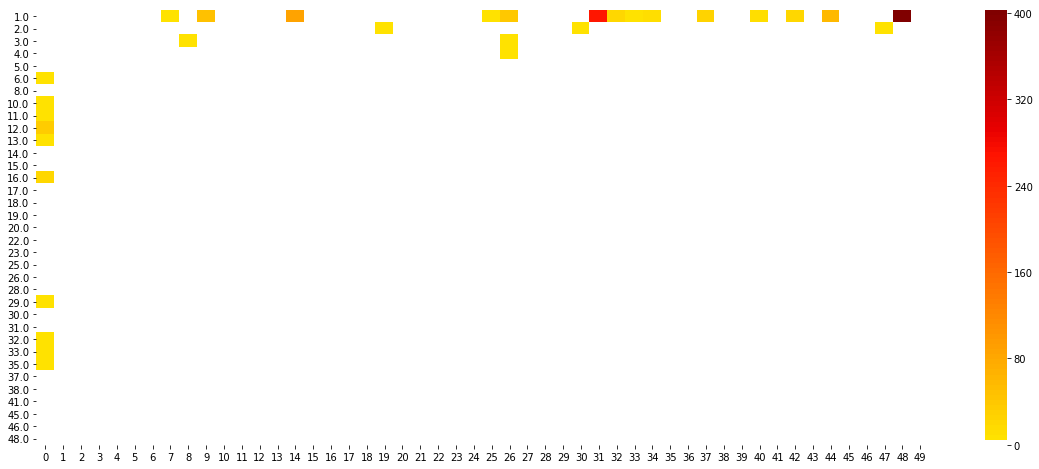

In [171]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 8))
sns.heatmap(df_from_dict, cmap=cmap_short)



plt.show()

In [170]:
cmap_blue = cmaplist[:125]

In [168]:
cmap_blue = cmap_blue[::-1]

In [148]:
cmap_blue[0] = (1,1,1,1)

In [ ]:
bounds = np.linspace(0,400,401)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

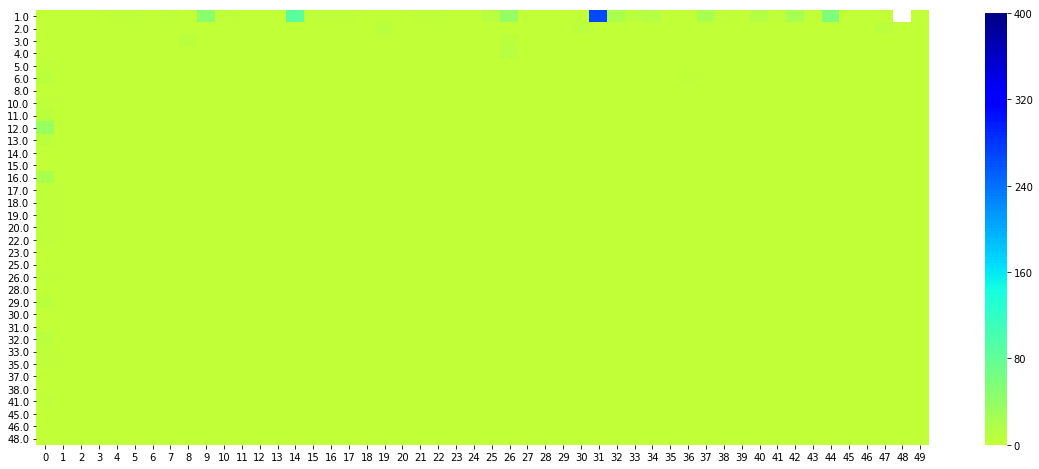

In [169]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 8))
sns.heatmap(df_from_dict, cmap=cmap_blue)



plt.show()